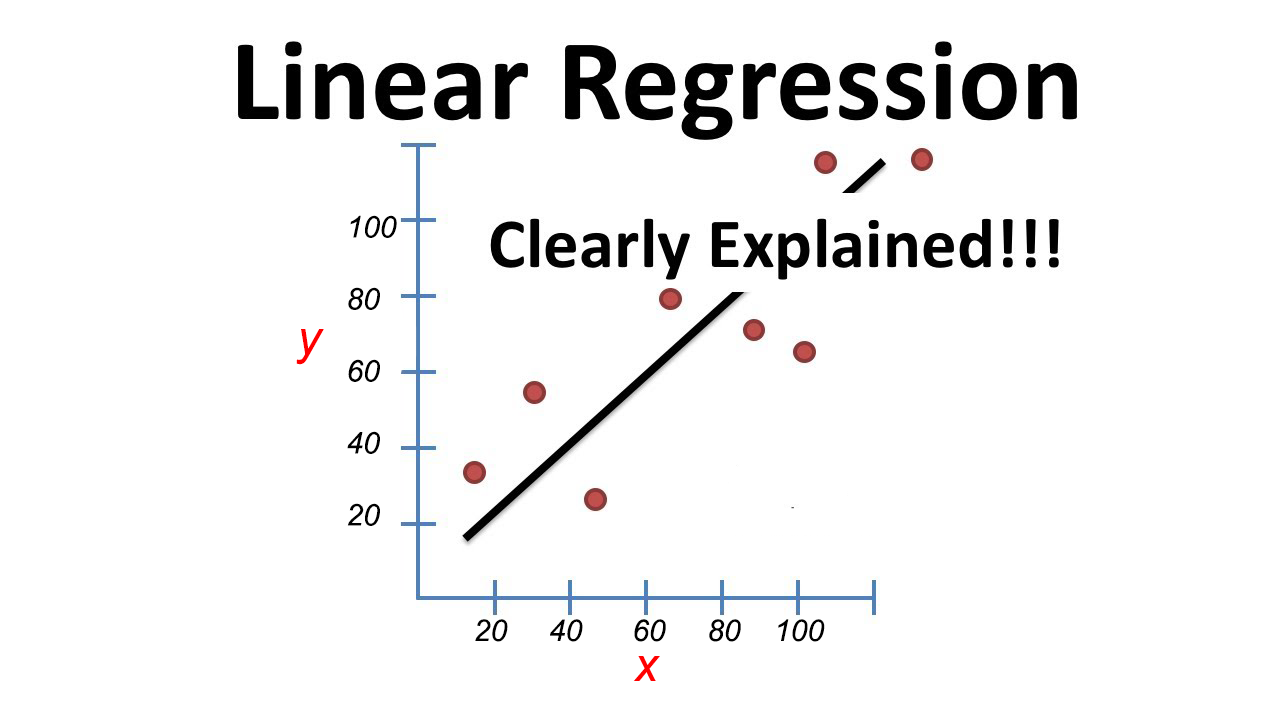

# **1- First (understanding and cleaning data)** 

**We should understand and clean data frame before creating ML model**

**we imported libraries to help us ..**

In [1]:
# visualization
library('ggplot2')

path <- '/kaggle/input/random-linear-regression/train.csv'

df <- read.csv(path)

head(df)

,x,y
,<dbl>,<dbl>
1,24,21.54945
2,50,47.46446
3,15,17.21866
4,38,36.58640
5,87,87.28898
6,36,32.46387


> Now, we has found two columns (x and y) this is a very basic data frame to study ML Model 
> 
> **Note: This is NOT real case in world , it's a case study,** in real world, that many features and reasons affect on a result..

**Let's clean data from missing data if found.**

In [2]:
paste("Number of missing data in every columns: ", sum(is.na(df)))

[1] "Number of missing data in every columns:  1"

# How do we deal with missing data?

**You have many options**
- **[DELETE missing values]** The easiest option, is to simply ignore any observations that have missing values. This is often called complete case analysis or listwise deletion of missing values. 

- **[Changing values to min, mean, max or any random value you specify that based on your understanding to data]** Another approach is to impute the missing values. This involves using statistical or machine learning models to make educated guesses based about the values of the missing data.


**NOTE:** **Use imputation carefully** Imputation is a complicated task because you have to weigh the pros and cons.

**BUT in our data, there is a one row is missing so we deleted that not affect performance of model..**

In [3]:
df <- na.omit(df)
sum(is.na(df))

[1] 0

**Let's clean data from duplicated rows if found.**

> **This causes an overfit problem.** this means model totally save data set and any new data model could NOT predicted accurately **[For imaging not scientific definition]**

In [4]:
paste("Number of duplicated data in every columns: ", sum(duplicated(df)))

[1] "Number of duplicated data in every columns:  0"

**NOT found duplicated data, it's fine.**

# **2- Second (describing and ploting)**

**We will describe and plot x and y to explore data**


**we separate columns to deal with them**

In [5]:
x <- df$x
y <- df$y

**Summary statistics**

In [6]:
summary(df)

       x                y         
 Min.   :  0.00   Min.   : -3.84  
 1st Qu.: 25.00   1st Qu.: 24.93  
 Median : 49.00   Median : 48.97  
 Mean   : 50.01   Mean   : 49.94  
 3rd Qu.: 75.00   3rd Qu.: 74.93  
 Max.   :100.00   Max.   :108.87  

**Plot x and y**

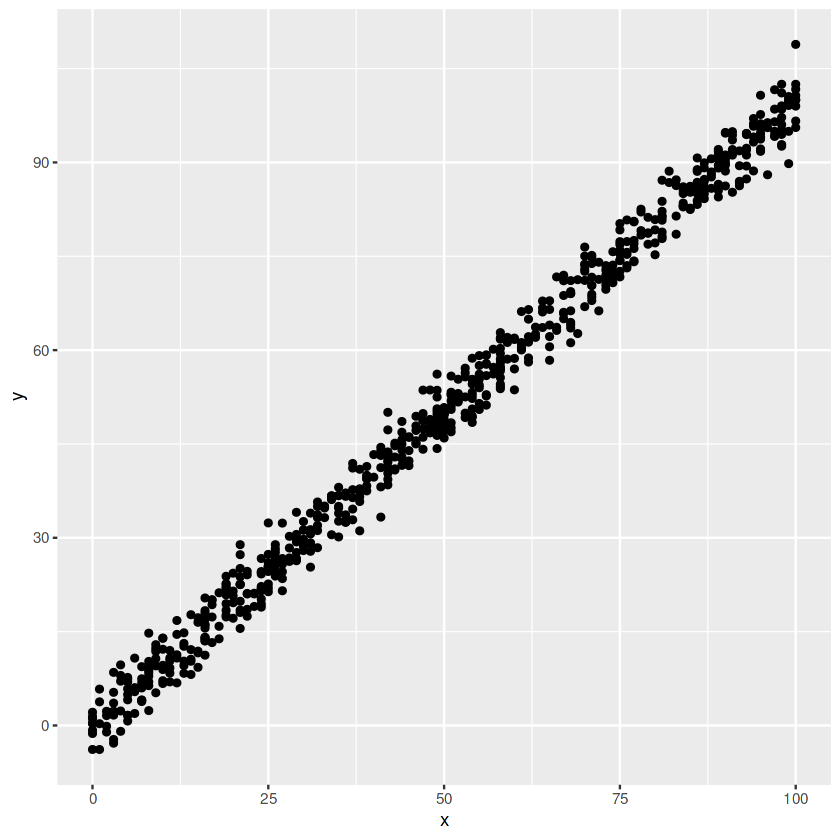

In [7]:
ggplot(data = df, aes(x, y)) + geom_point()

**This is graph to ease imagine our data**

**we found there is NOT outliers in our data from this graph**

> In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to a variability in the measurement..

**NOW, Let's see distribution of data**

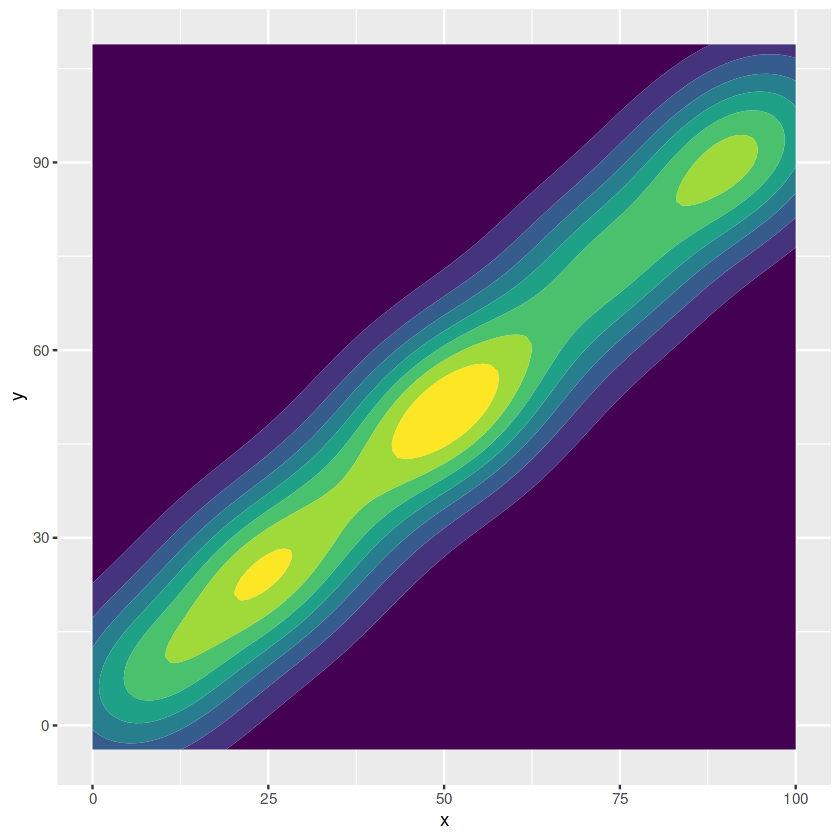

In [8]:
ggplot(data = df, aes(x, y)) + 
geom_density2d_filled() + 
theme(legend.position = "none")

**Almost Line Shape..**

**This help us to choose model of ML, in this case Linear regression is totally fit our data..**

**Before Creating model let's esimate Correlation between x and y**

> **Linear Correlation**
> 
> The purpose of linear correlation is to measure the proximity of a mathematical relationship between the variables of a dataset to a linear function.
> 
> If the relationship between the two variables is found to be closer to a linear function, then they have a stronger linear correlation and the absolute value of the correlation coefficient is higher.
> 



In [9]:
print(paste("Correlation (Pearson's Method):", round(cor(x, y)*100, 2), "%"))

[1] "Correlation (Pearson's Method): 99.53 %"


**It's totally Correlated**

**NOTE: Spearman Correlation is another method of correlation for the two variables are non-linear, NOT use Mean and Standard Deviation and NOT affected of Outliers values, unlike Pearson's Method.**

# **3- Third (Best Fit Line of linear regression model)**

> Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables.

**Hypothesis function for Linear Regression :**

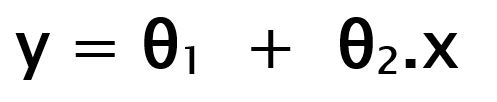

> While training the model we are given : x: input training data (univariate – one input variable(parameter)) y: labels to data (Supervised learning) When training the model – it fits the best line to predict the value of y for a given value of x. The model gets the best regression fit line by finding the best θ1 and θ2 values. θ1: intercept θ2: coefficient of x Once we find the best θ1 and θ2 values, we get the best fit line. So when we are finally using our model for prediction, it will predict the value of y for the input value of x. 

**We will use scipy.stats library to estimate it..**

In [10]:
res <- lm(y ~ x)
paste("y = ", res$coefficients[1], "+" , res$coefficients[2], "x")

[1] "y =  -0.107265464300975 + 1.0006563818563 x"

**How to update θ1 and θ2 values to get the best fit line?**

> **Cost Function (J):** By achieving the best-fit regression line, the model aims to predict y value such that the error difference between predicted value and true value is minimum. So, it is very important to update the θ1 and θ2 values, to reach the best value that minimize the error between predicted y value (pred) and true y value (y). 

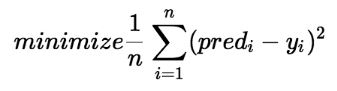

**Plot the data along with the fitted line:**

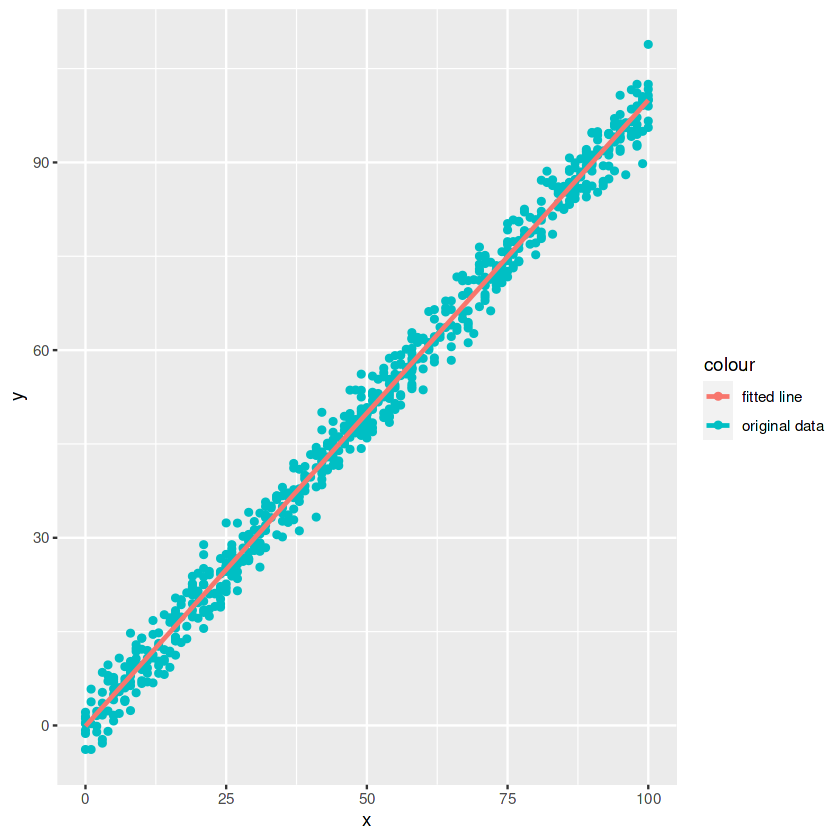

In [11]:
ggplot(df, aes(x=x, y=y)) + 
geom_point(aes(col='original data')) + 
geom_smooth(method=lm, se=FALSE, formula = 'y ~ x', aes(col='fitted line'))

**We found best fit line of data in this graph.**

# **4- Fourth (Create ML model with sklearn)**

**Let's Create a real model with sklearn library to predict test data and geat score for model.**

**Imported test data**

In [12]:
path2 <- '/kaggle/input/random-linear-regression/test.csv'
test_data <- read.csv(path)
test_data <- na.omit(test_data)
head(test_data)

,x,y
,<dbl>,<dbl>
1,24,21.54945
2,50,47.46446
3,15,17.21866
4,38,36.58640
5,87,87.28898
6,36,32.46387


In [13]:
paste("Count of rows in TrainData = TestData",sum(df$x == test_data$x))

[1] "Count of rows in TrainData = TestData 699"

**TrainDataSet is clearly like TestDataSet**

**[The files are the same..] so we ignore it**

**CREATE Linear Regression Model with sklearn..**

**we seperate data to train data 80% and test data 20% to score model and performance**

In [14]:
library('caTools')

set.seed(1)

# use 80% of dataset as training set and 20% as test set
sample <- sample.split(df, SplitRatio = 0.8)
train  <- subset(df, sample == TRUE)
test   <- subset(df, sample == FALSE)

x_train <- train$x
y_train <- train$y
x_test <- data.frame(test$x)
y_test <- data.frame(test$y)


reg <- lm(y_train ~ x_train)
# y_pred <- predict(reg, newdata = x_test)

# **5- Fifth (Scoring MODEL)**

In [15]:
summary(reg)


Call:
lm(formula = y_train ~ x_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.9643 -2.0304  0.1654  1.8378  8.1999 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.07954    0.28825  -0.276    0.783    
x_train      0.99848    0.00512 195.016   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.843 on 348 degrees of freedom
Multiple R-squared:  0.9909,	Adjusted R-squared:  0.9909 
F-statistic: 3.803e+04 on 1 and 348 DF,  p-value: < 2.2e-16


**THANK YOU** 

**if we help you, please upvote..**

# Refrence
**[geeksforgeeks](https://www.geeksforgeeks.org/ml-linear-regression/) for Definition**

**[statology](https://www.statology.org/ggplot2-linear-regression/) for ML model**